In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns

In [2]:
# source data https://www.kaggle.com/datasets/datazng/telecom-company-churn-rate-call-center-data
df=pd.read_csv("telecom_churn.csv")

# EDA

In [3]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.515689,0.419566
std,0.368612,24.559481,30.090047,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,0.000000
max,1.000000,72.000000,118.750000,5.000000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no null values for all columns.
However, TotalCharges is reported as object, which is wrong. Let's analyse


In [6]:
print(df['TotalCharges'].str.contains('[a-zA-Z]').sum())
print(df['TotalCharges'].isnull().sum())
print(df['TotalCharges'].isna().sum())
print(df['TotalCharges'].unique())
#pd.to_numeric(df['TotalCharges'], errors='coerce')

0
0
0
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [7]:
df[df['TotalCharges'].apply(pd.to_numeric, errors='coerce').isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,5,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,1,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,,0,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,5,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,,0,0,No


There are 11 rows with unusual values in TotalCharges column that can't identified, but the values are converted to NaN by to_numeric function. 
Let's convert the values and then drop 11 records completely.

In [8]:
df_raw=df
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df.shape

(7032, 23)

                                             |          | [  0%]   00:00 -> (? left)


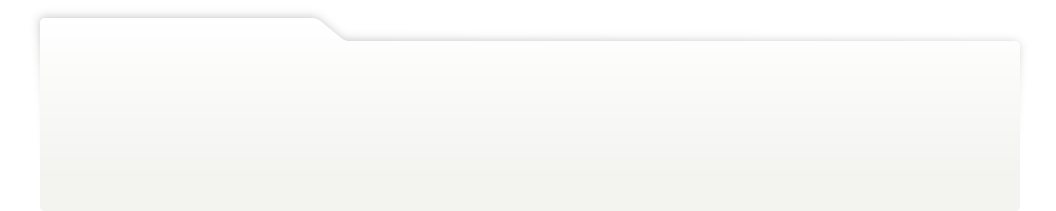
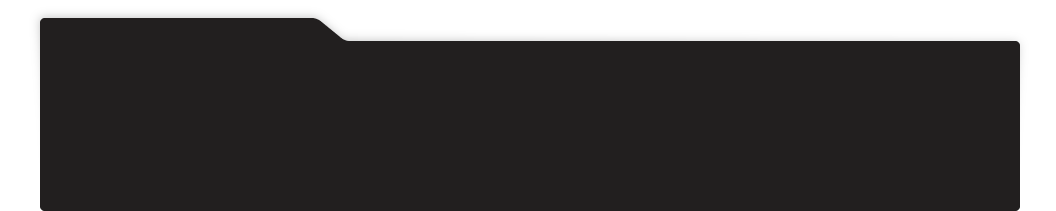
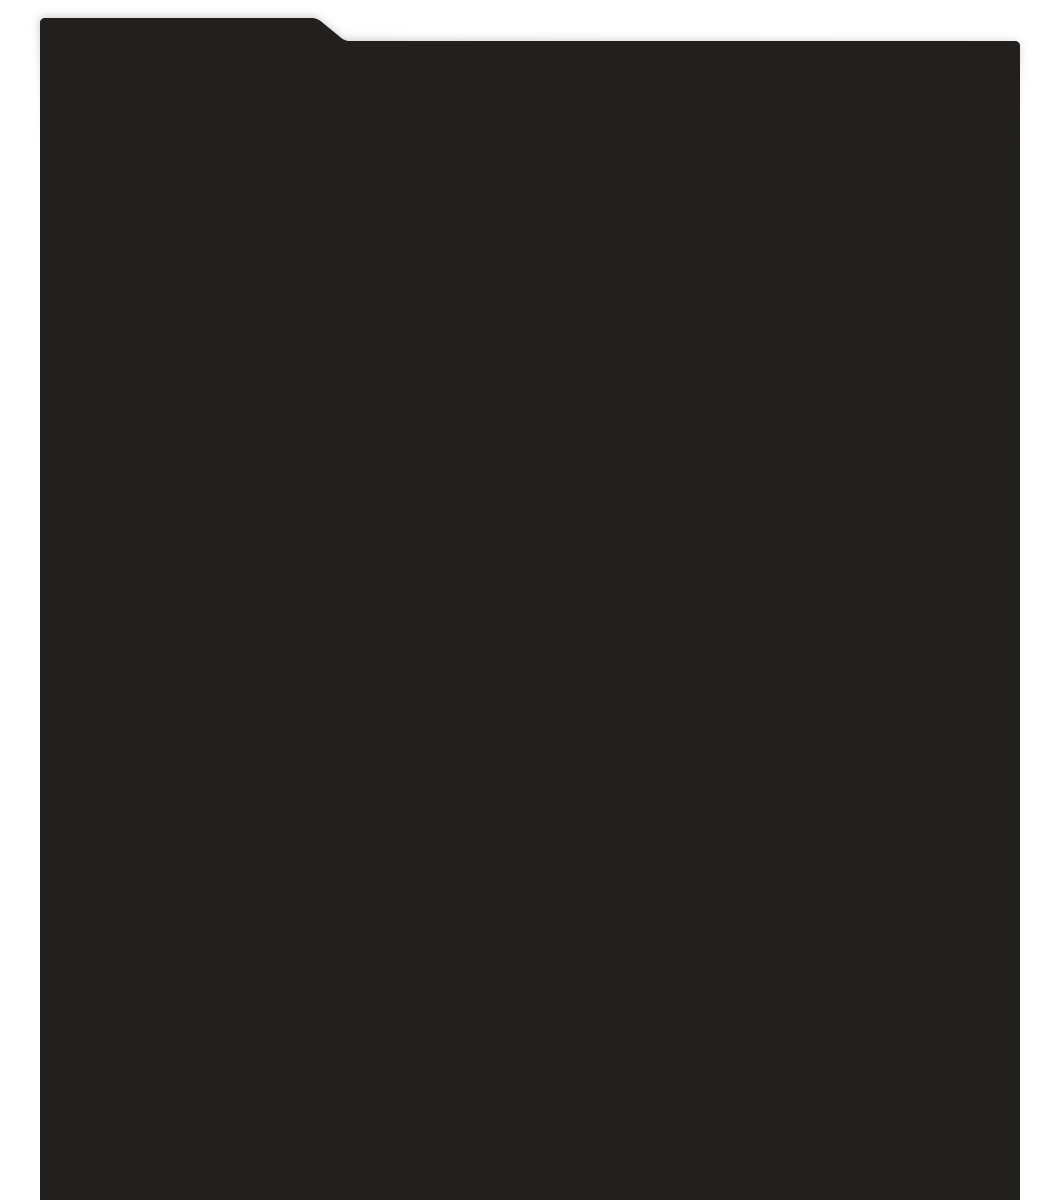
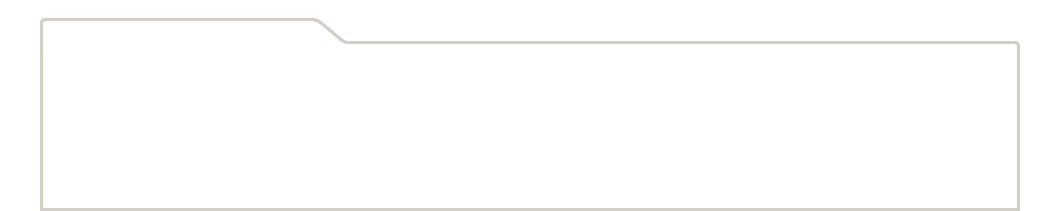
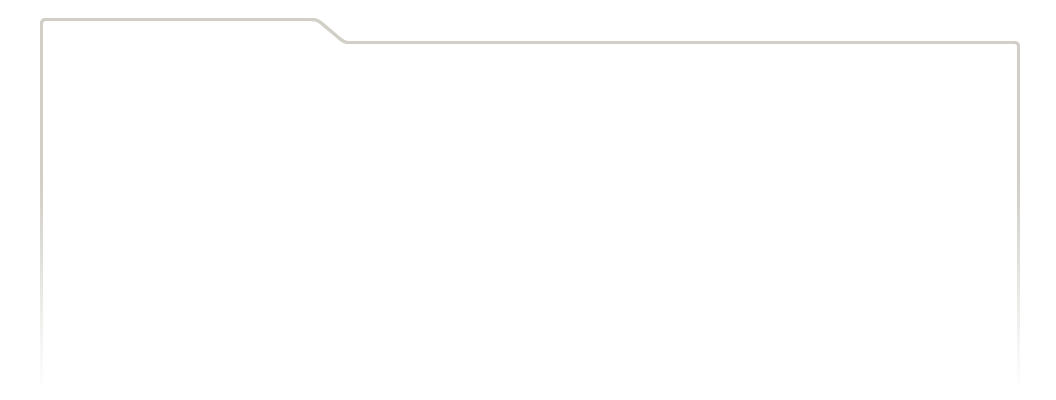
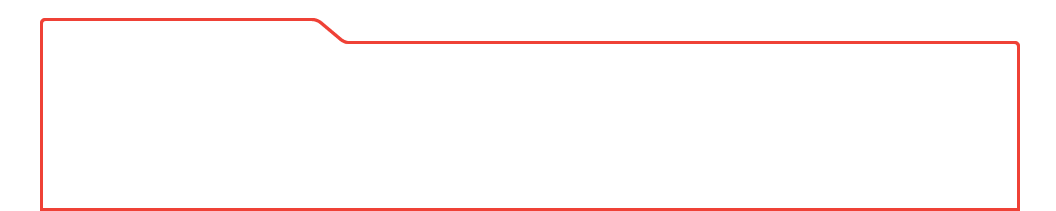
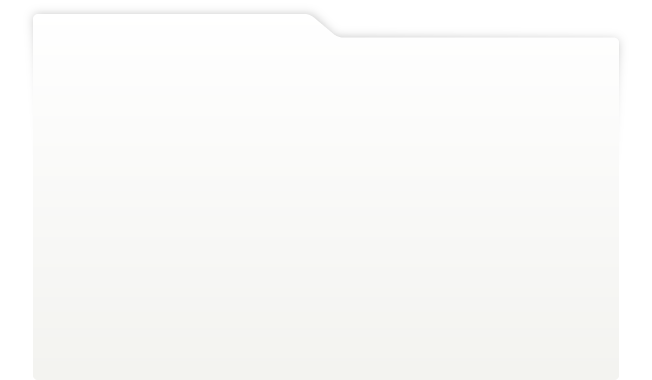
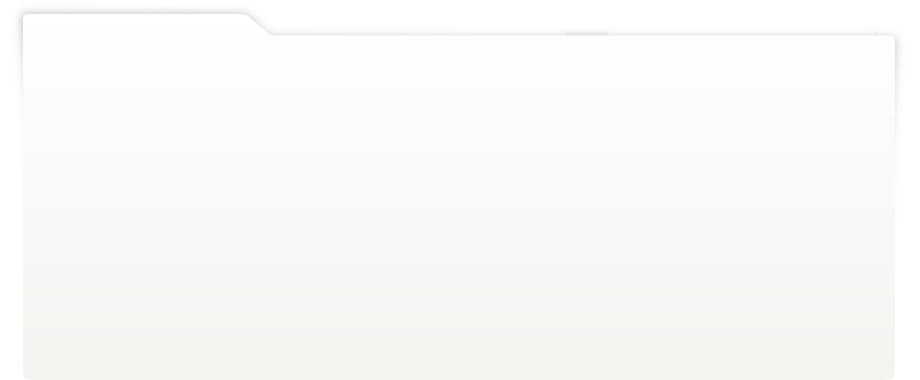
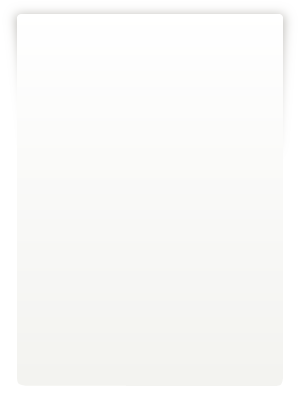
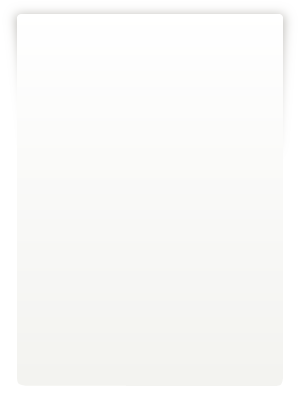
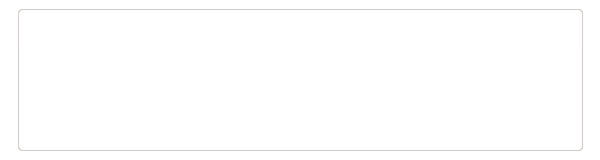
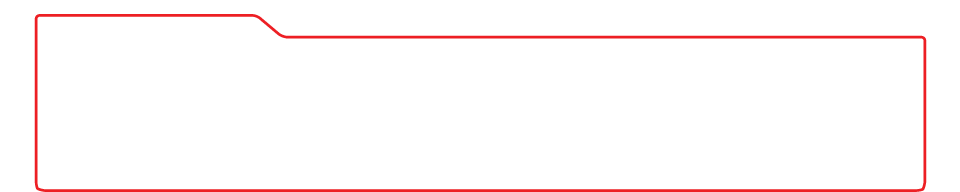
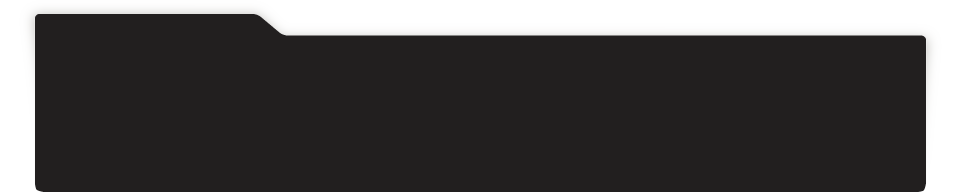
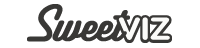
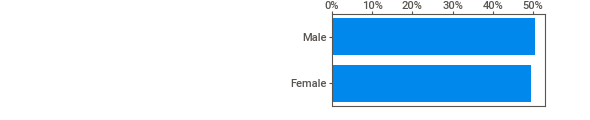
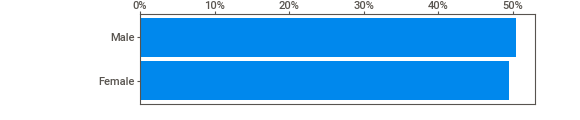
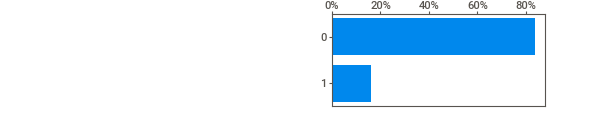
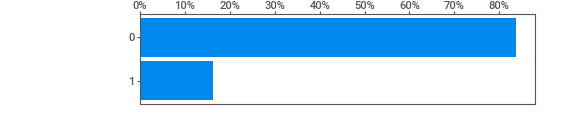
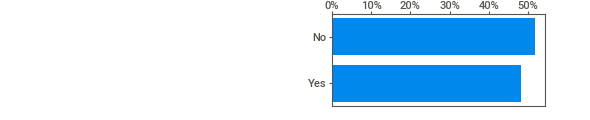
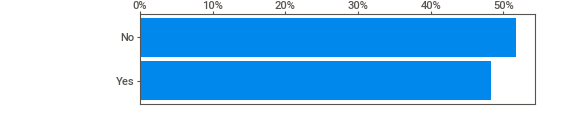
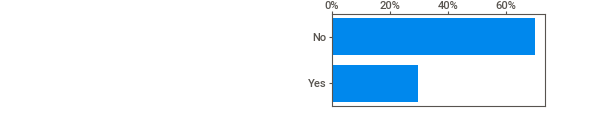
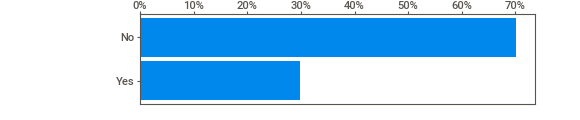
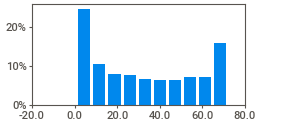
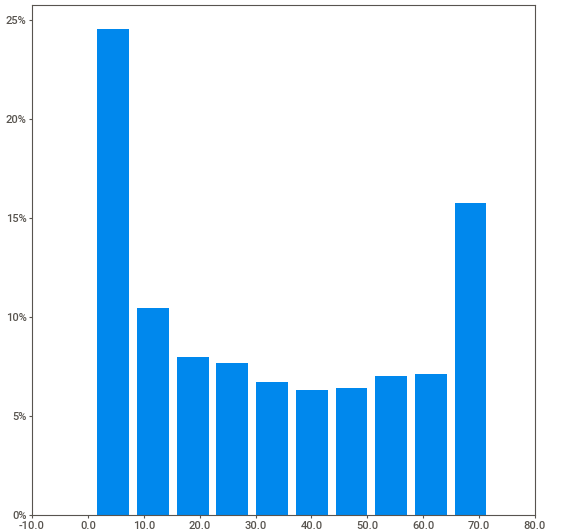
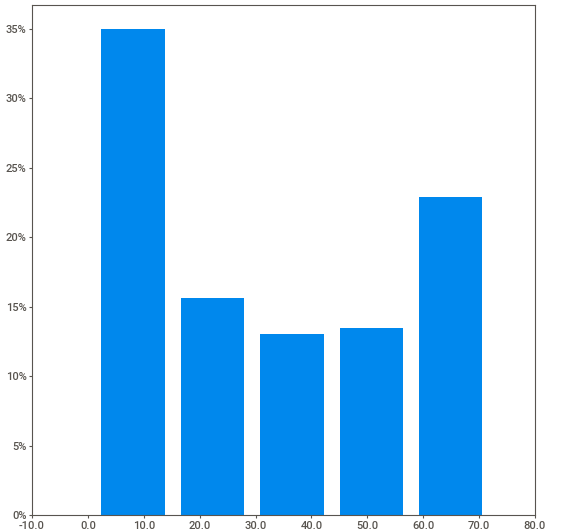
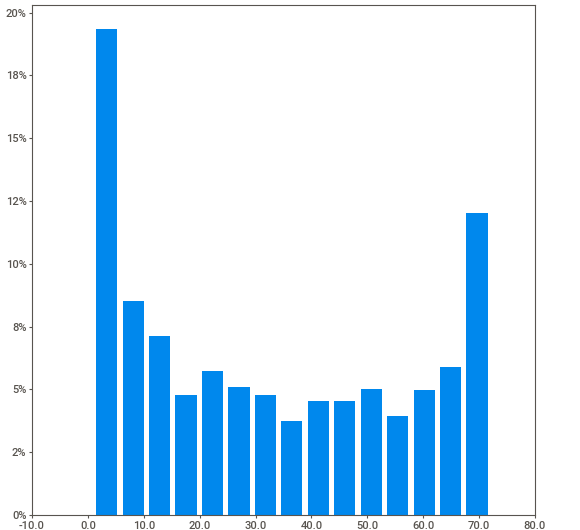
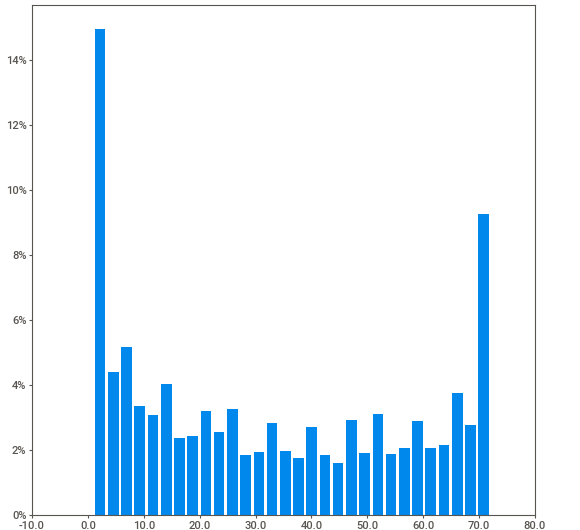
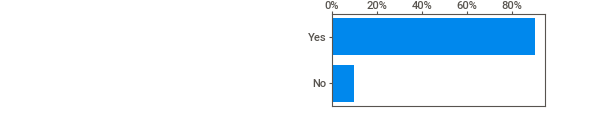
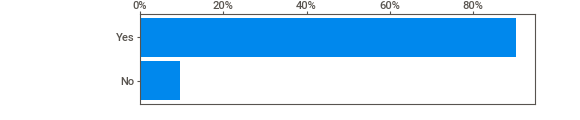
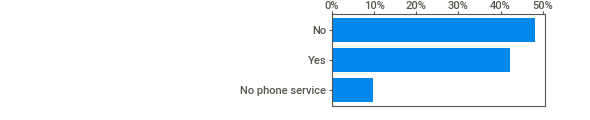
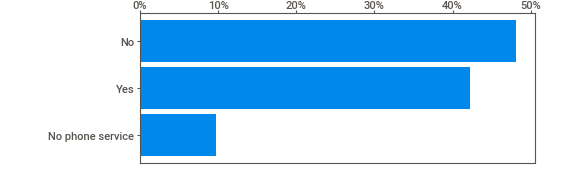
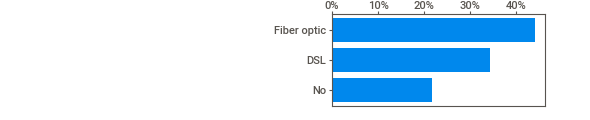
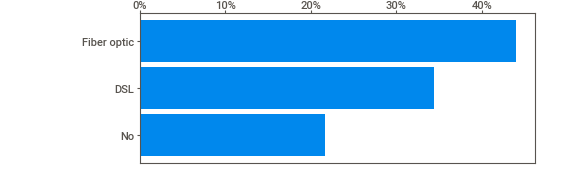
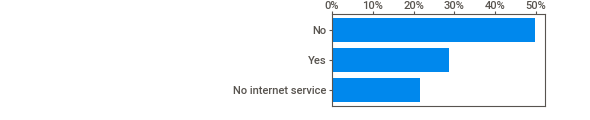
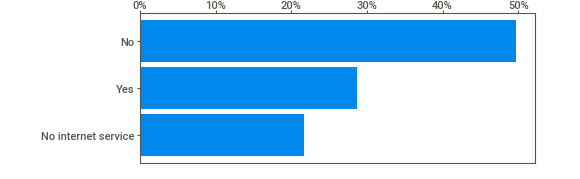
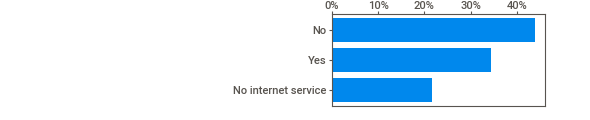
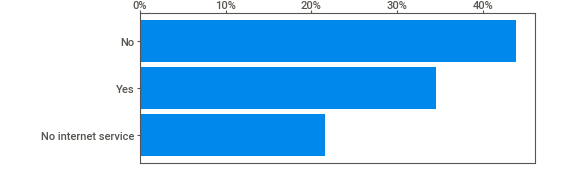
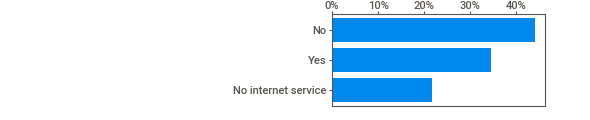
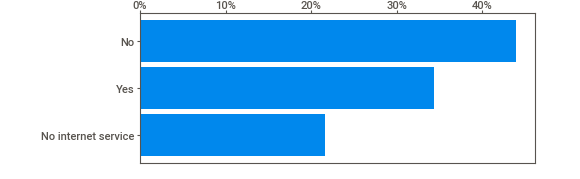
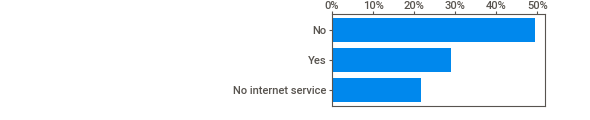
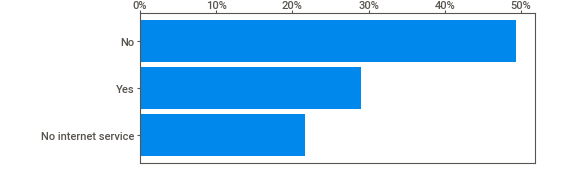
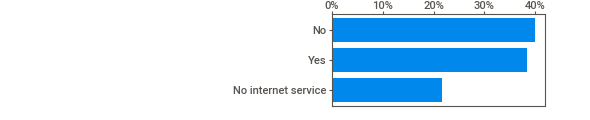
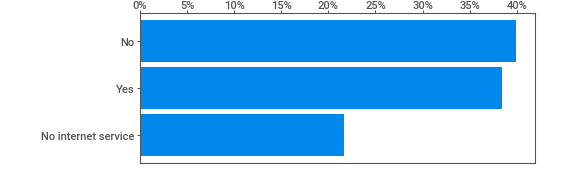
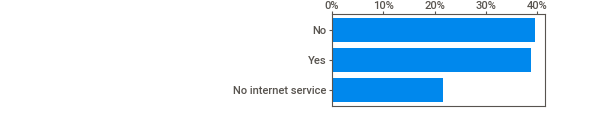
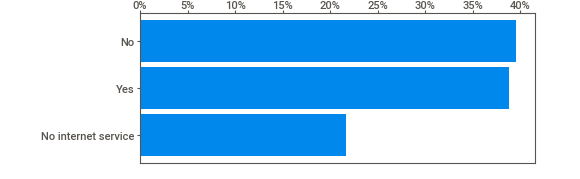
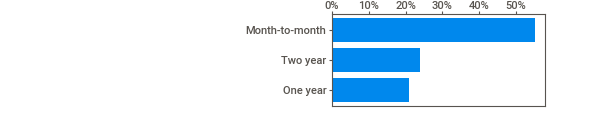
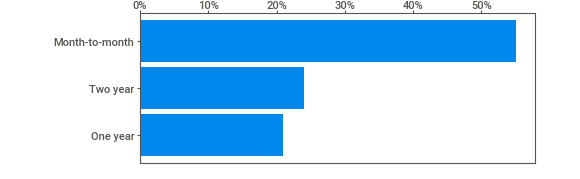
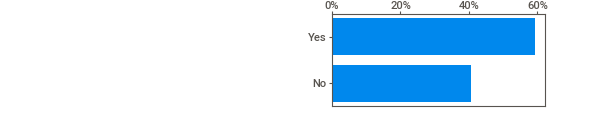
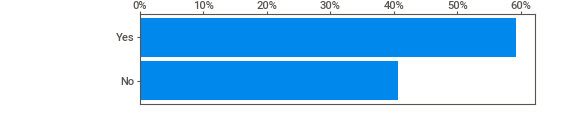
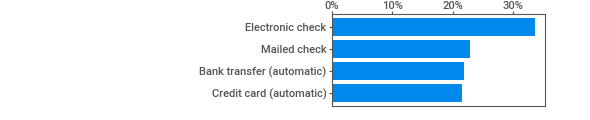
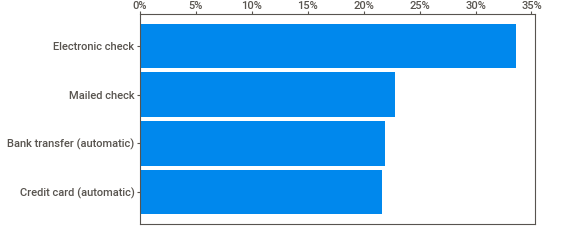
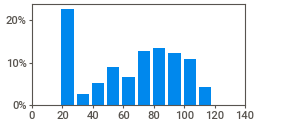
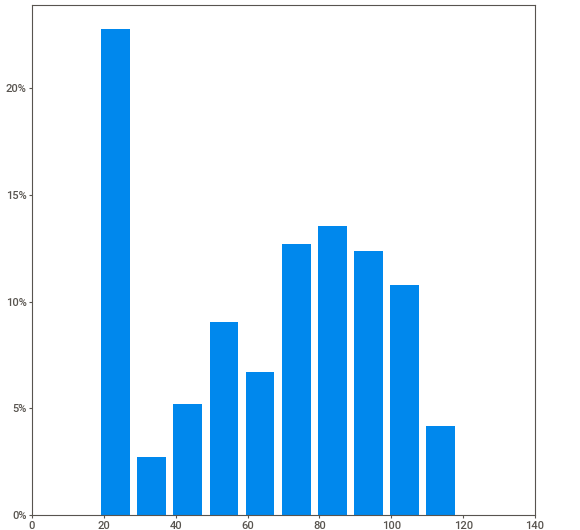
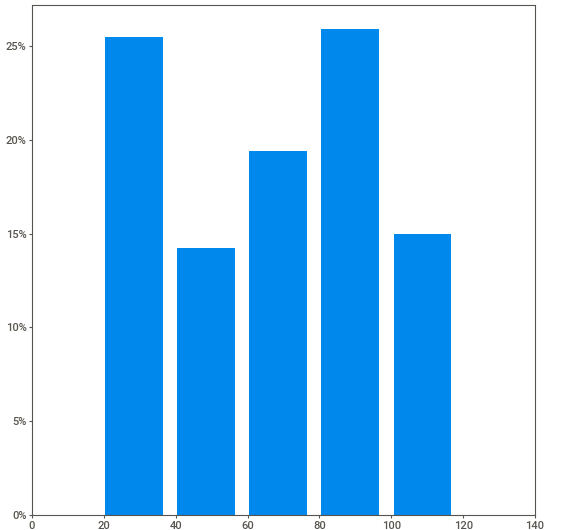
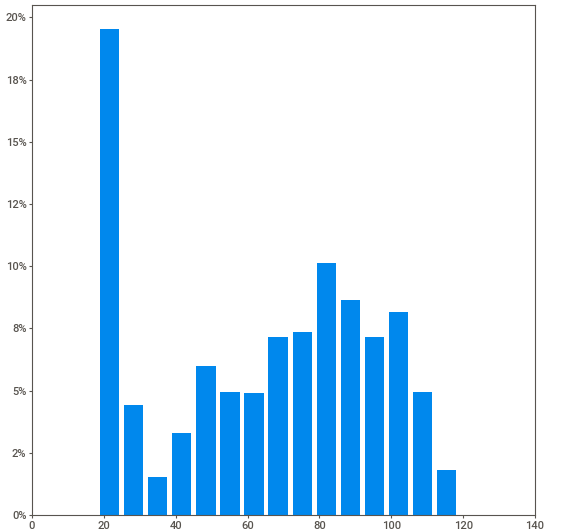
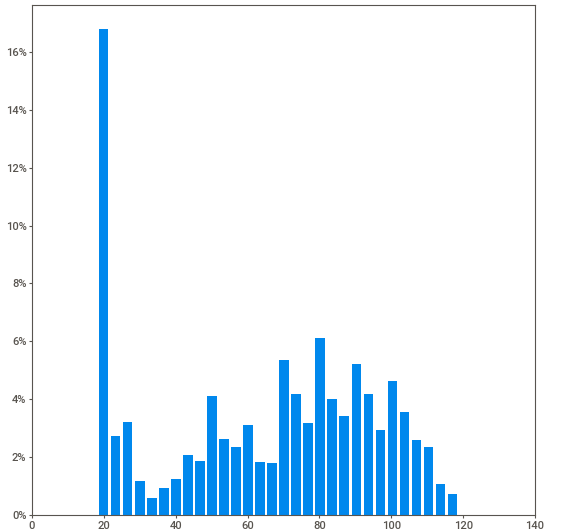
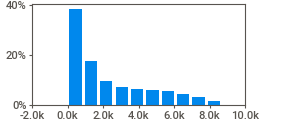
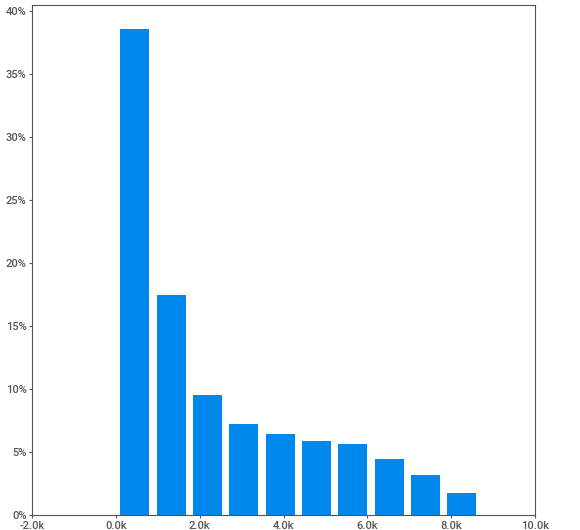
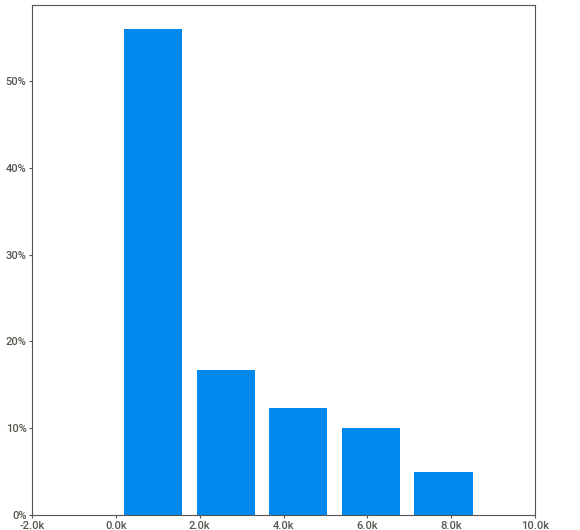
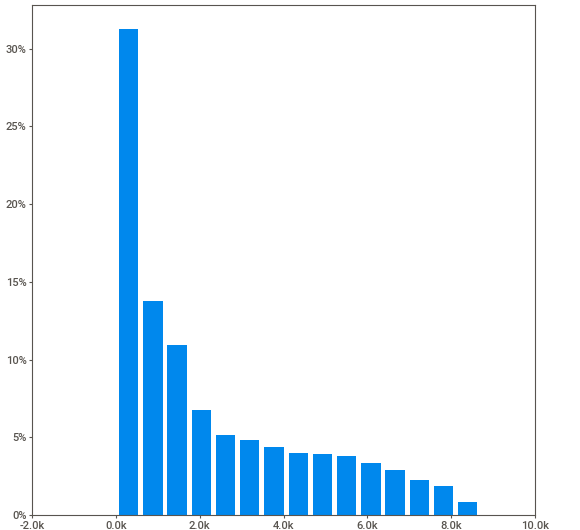
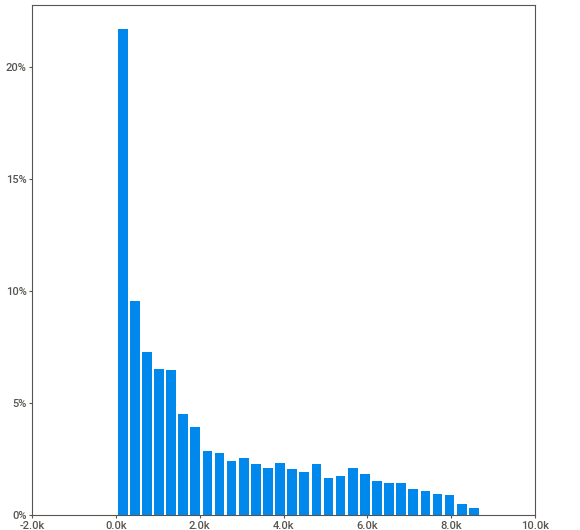
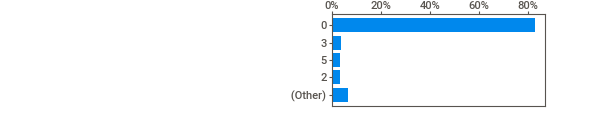
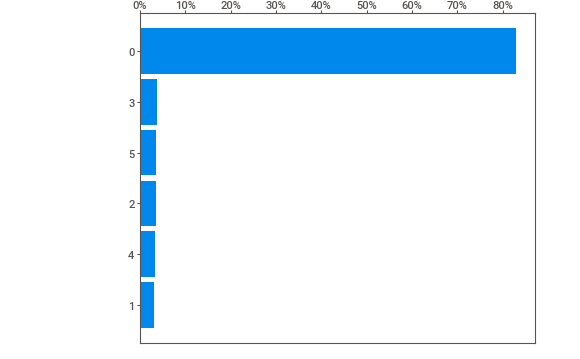
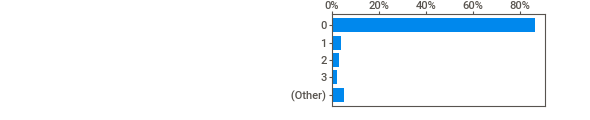
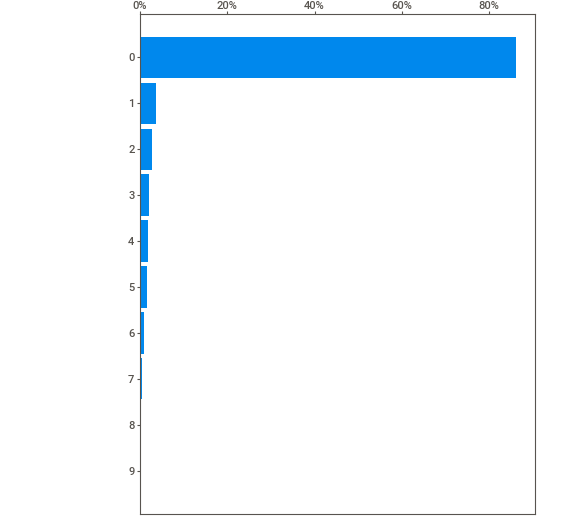
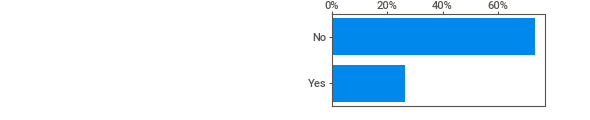
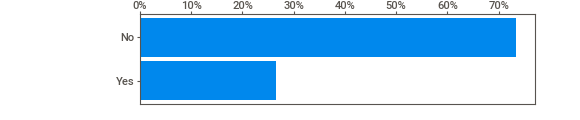
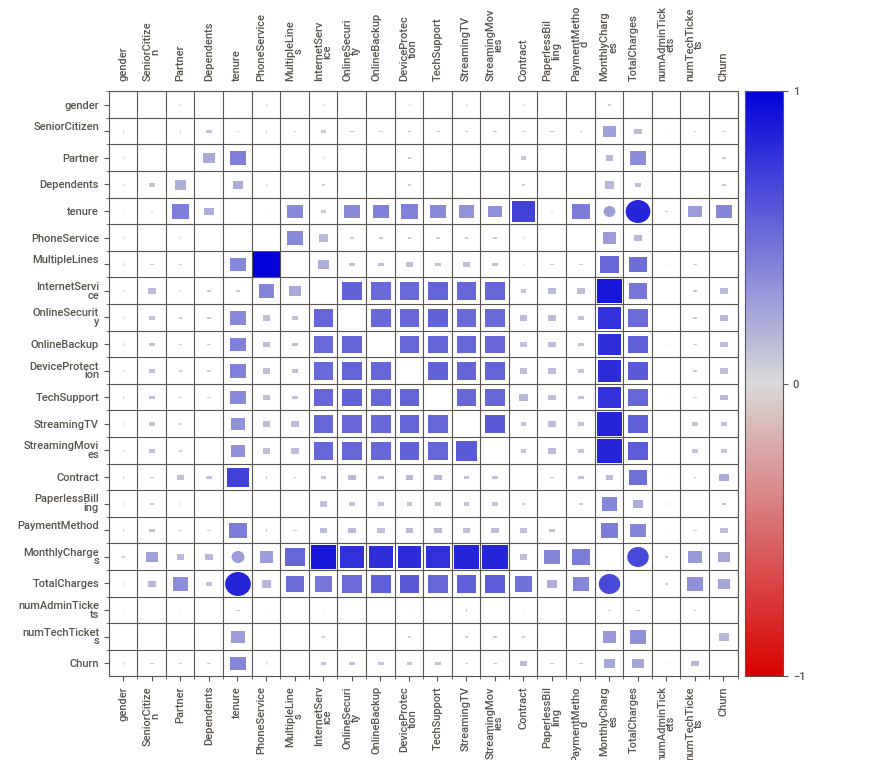
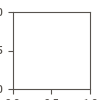

In [10]:
report = sv.analyze(df)

report.show_notebook()


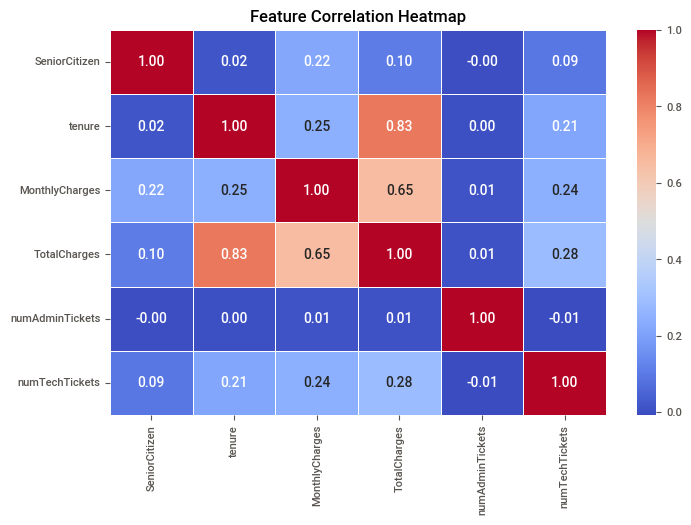

In [11]:

correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap")
plt.show()

No obvious correlations between numeric columns, let's check again after the label encoding

# Data Preparation

There are string  columns, so I have to encode categorical columns (e.g., Gender, InternetService)

In [12]:
# dropping customerID
df=df.drop('customerID',axis=1)

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
# swapping 'Not applicable' (e.g., 'No Internet Service') values to No and replacing yes with 1 and No with 0
df['StreamingMovies'] = np.where(df['StreamingMovies']=='Yes',1,0)
df['StreamingTV'] = np.where(df['StreamingTV']=='Yes',1,0)
df['TechSupport'] = np.where(df['TechSupport']=='Yes',1,0)
df['DeviceProtection'] = np.where(df['DeviceProtection']=='Yes',1,0)
df['OnlineBackup'] = np.where(df['OnlineBackup']=='Yes',1,0)
df['OnlineSecurity'] = np.where(df['OnlineSecurity']=='Yes',1,0)
df['MultipleLines'] = np.where(df['MultipleLines']=='Yes',1,0)

In [15]:
# Applying Label Enconding for the binary categorical columns

#default mapping No-0,Yes-1; Female-0,Male-1
df['gender']=encoder.fit_transform(df['gender'])
df['Partner']=encoder.fit_transform(df['Partner'])
df['Dependents']=encoder.fit_transform(df['Dependents'])
df['PhoneService']=encoder.fit_transform(df['PhoneService'])
df['PaperlessBilling']=encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=encoder.fit_transform(df['PaymentMethod'])
df['Churn']=encoder.fit_transform(df['Churn'])

# explicit mapping
df['Contract'] = df['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
df['InternetService'] = df['InternetService'].map({'No':0, 'DSL':1, 'Fiber optic':2})

<Axes: xlabel='TotalCharges', ylabel='Count'>

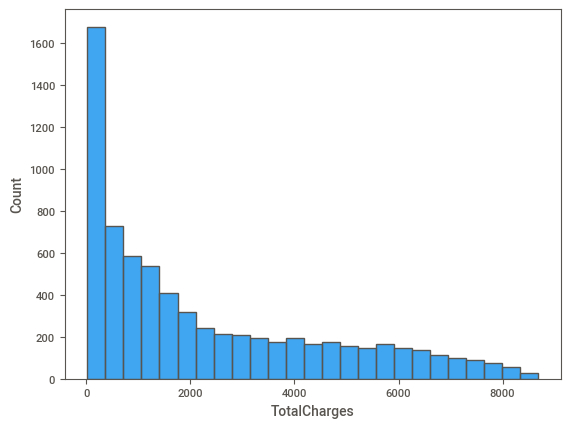

In [16]:
sns.histplot(df['TotalCharges'])

<Axes: ylabel='TotalCharges'>

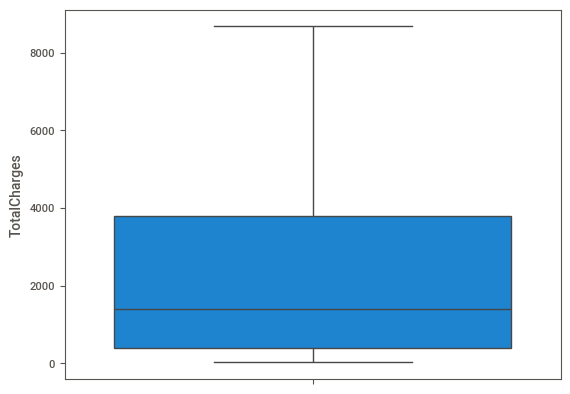

In [17]:
sns.boxplot(df['TotalCharges'])

In [18]:
df['PaymentMethod']=encoder.fit_transform(df['PaymentMethod'])

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

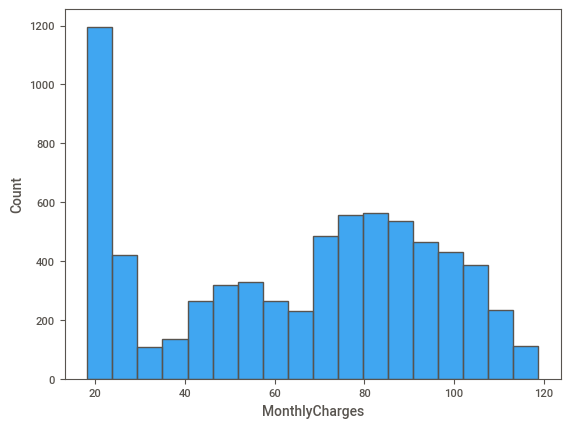

In [19]:
sns.histplot(df['MonthlyCharges'])

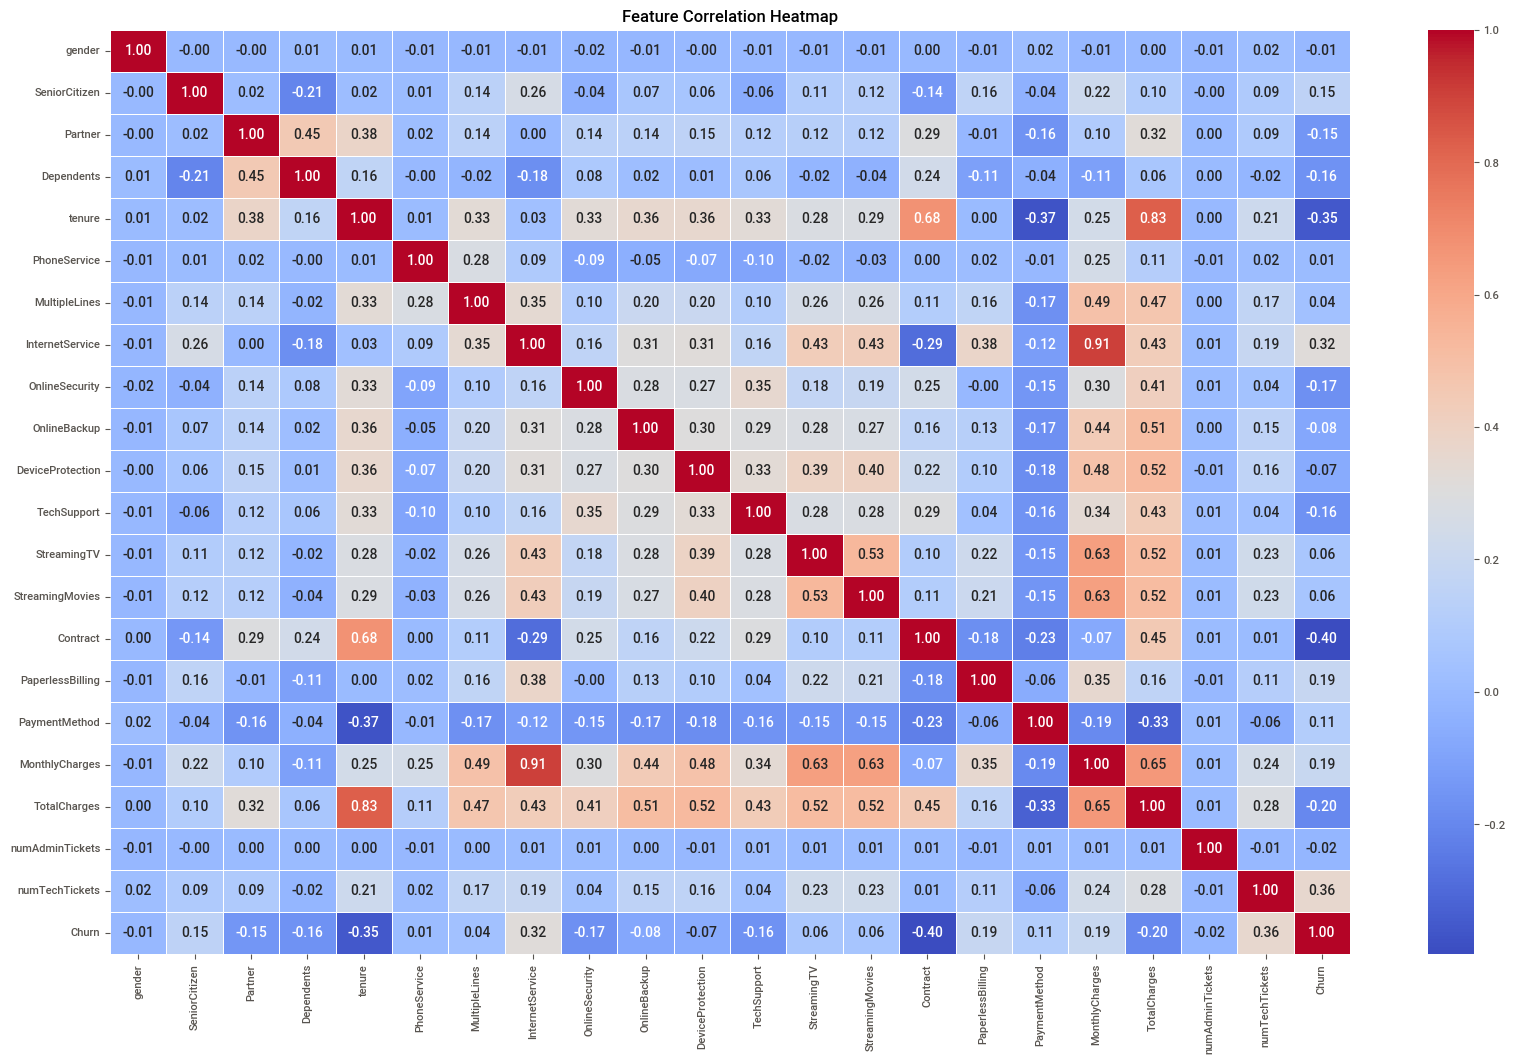

In [20]:
# check the correlation matrix again after the encoding

correlation_matrix = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

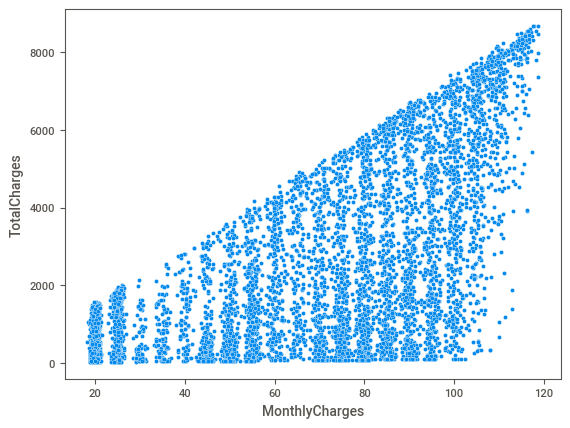

In [91]:
sns.scatterplot(df, x='MonthlyCharges',y='TotalCharges')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


<Axes: xlabel='tenure', ylabel='TotalCharges'>

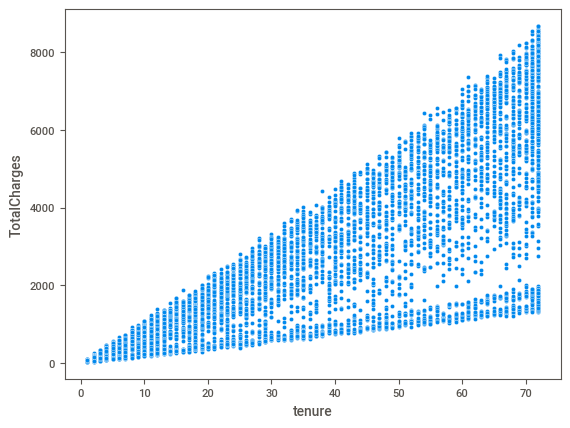

In [90]:
sns.scatterplot(df, x='tenure', y='TotalCharges')

There are is a correlated pair of variables - InternetService/MonthlyCharges - and a few less correlated pairs: StreamingTV/MonthlyCharges, StreamingMovies/MonthlyCharges, Contract/Tenure, StreamingTV/StreamingMovies. All of them make sense to keep for the further feature importance testing. 
The Contract/Tenure pair looks suspicious and a candidate on a removal of one of them, but it will be clear on the feature importance test

In [94]:
df[['tenure','MonthlyCharges','TotalCharges']].head(20)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
5,8,99.65,820.50
6,22,89.10,1949.40
7,10,29.75,301.90
8,28,104.80,3046.05
9,62,56.15,3487.95


# Model fitting

In [23]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [24]:
X.shape

(7032, 21)

In [25]:
y.shape

(7032,)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [28]:
print(X_train.shape)
print(X_test.shape)


(5625, 21)
(1407, 21)


In [51]:
model=RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)  
 
accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy: {accuracy:.5f}")  

Accuracy: 0.85785


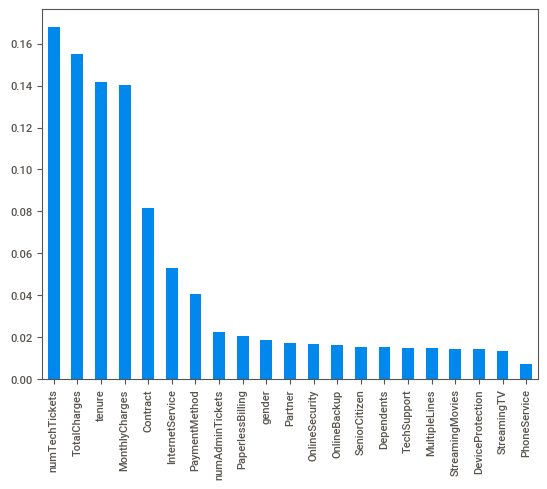

In [32]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)  
feature_importances.sort_values(ascending=False).plot(kind="bar")  
plt.show()  

In [37]:
from sklearn.metrics import mean_absolute_error

def get_mae(n_est, X_train, X_test, y_train, y_test):
    model=RandomForestClassifier(n_estimators=n_est, random_state=1)
    model.fit(X_train,y_train)
 #   model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
 #   model.fit(X_train,y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)


In [81]:
nodes_range=np.arange(10,201,5)

mae_scores = {n_est: get_mae(n_est, X_train, X_test, y_train, y_test) for n_est in nodes_range}
#mae_scores


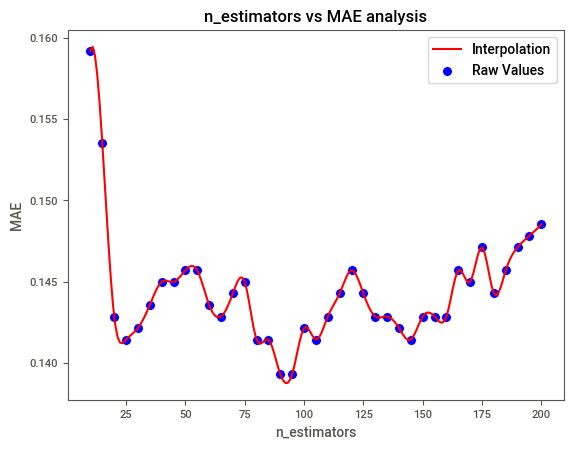

Minimal MAE: 0.139 achieved with n_estimators=90


In [89]:
from scipy.interpolate import make_interp_spline
xval=np.array(nodes_range)
yval=np.array(list(mae_scores.values()))

x_smooth = np.linspace(xval.min(), xval.max(), 200)  # Больше точек для плавности
spl = make_interp_spline(xval, yval, k=3)  # k=3 делает кубический сплайн
y_smooth = spl(x_smooth)

sns.lineplot(x=x_smooth, y=y_smooth, label="Interpolation", color='red')
sns.scatterplot(x=xval, y=yval, color='blue', s=50, label="Raw Values")  # Показываем исходные точки

plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.title('n_estimators vs MAE analysis')
plt.legend()
plt.show()

min_index = np.argmin(mae_res)
#print(f"Minimal MAE: {mae_res[min_index]:.3f} achieved with n_estimators={nodes_range[min_index]}")
print(f"Minimal MAE: {min(mae_scores.values()):.3f} achieved with n_estimators={min(mae_scores,key=mae_scores.get)}")


In [83]:
# let's try with 90

model=RandomForestClassifier(n_estimators=90, random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy: {accuracy:.5f}")  

Accuracy: 0.86070
